# 实验2 直方图和图像变换

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import cv2
import numpy as np

apple_image_path = './apple.jpg'
hear_image_path = './heart.jpeg'
underwater_image_path = './underwater.png'

## 1. 使用OpenCV打开一个彩色图像文件，对其进行灰度转换、二值等操作，使用imread函数显示原图像和变换后的图像，并将变换后的灰度图像和二值化图像分别保存为新文件。

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

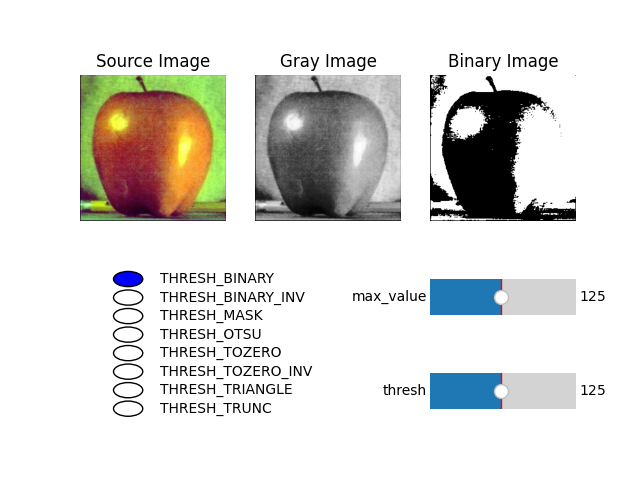

In [2]:
fig_interactive, ax_interactive = plt.subplot_mosaic('ABC;DDE;DDF',
                                                     gridspec_kw={'height_ratios': [5, 2, 2]})

binary_type = {'THRESH_BINARY': cv2.THRESH_BINARY,
              'THRESH_BINARY_INV': cv2.THRESH_BINARY_INV,
              'THRESH_MASK': cv2.THRESH_MASK,
              'THRESH_OTSU': cv2.THRESH_OTSU,
              'THRESH_TOZERO': cv2.THRESH_TOZERO,
              'THRESH_TOZERO_INV':cv2.THRESH_TOZERO_INV,
              'THRESH_TRIANGLE':cv2.THRESH_TRIANGLE,
              'THRESH_TRUNC':cv2.THRESH_TRUNC
               }

binary_type_selector = widgets.RadioButtons(ax_interactive['D'],
                                            list(binary_type.keys()))

max_val_slider = widgets.Slider(ax=ax_interactive['E'], label='max_value',
                                valmin=1, valmax=255, valstep=1, valinit=125)

thresh_slider = widgets.Slider(ax=ax_interactive['F'], label='thresh',
                               valmin=1, valmax=255, valstep=1, valinit=125)

source_image = cv2.imread(apple_image_path)
gary_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)

ax_interactive['A'].imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))
ax_interactive['A'].set_title('Source Image')

ax_interactive['B'].imshow(gary_image, cmap='gray')
ax_interactive['B'].set_title('Gray Image')

ax_interactive['C'].set_title('Binary Image')

[ax.axis('off') for ax in ax_interactive.values()]

def update(_):
    _, binary_image = cv2.threshold(gary_image,
                                    thresh_slider.val,
                                    max_val_slider.val,
                                    binary_type[binary_type_selector.value_selected])
    ax_interactive['C'].imshow(binary_image, cmap='gray')

    return binary_image

binary_type_selector.on_clicked(update)
max_val_slider.on_changed(update)
thresh_slider.on_changed(update)

_ = update(None)

> 提示：重新运行下列单元格拷贝结果。

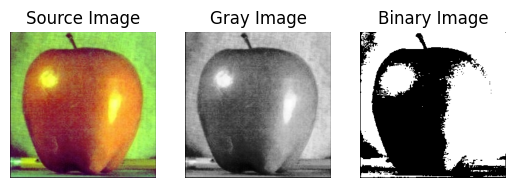

In [3]:
with plt.ioff():
    fig, ax = plt.subplots(1, 3)

ax[0].imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Source Image')

ax[1].imshow(gary_image, cmap='gray')
ax[1].set_title('Gray Image')

ax[2].imshow(update(None), cmap='gray')
ax[2].set_title('Binary Image')

[a.axis('off') for a in ax]

display(fig)

## 2. 使用numpy创建一幅大小为240×320（HW×）的图像（多维数组），图像中心是一个大小为100×100的红色正方形，周围是黑色，将图像保存为新文件。

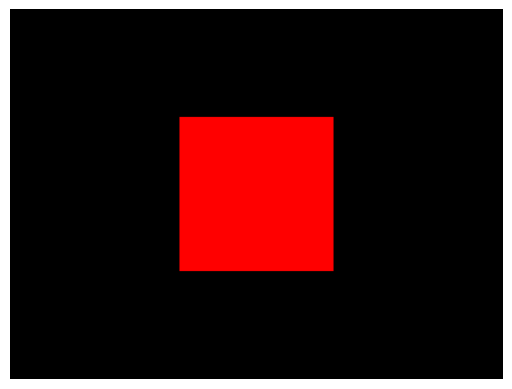

In [4]:
import numpy
import matplotlib.pyplot as plt

img = numpy.zeros((240,320,3), dtype=numpy.uint8)

square_size = 100
start_row = (240 - square_size) // 2
start_col = (320 - square_size) // 2

img[start_row : (start_row + square_size), start_col : (start_col + square_size)] = [255, 0, 0]

with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(img)
ax.axis('off')

display(fig)

## 3. 对附件中图片”underwater.png”进行直方图均衡化，提高图像的清晰度。

> 提示：该单元格输出是交互式的。由于`matplotlib.widgets`只能存在一个可交互的UI事件循环，因此如果下列结果无法交互只需重新运行下列单元格即可。

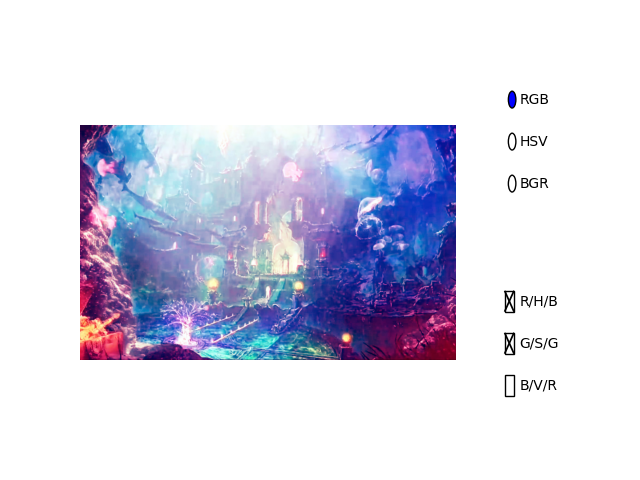

In [5]:
fig_interactive, ax_interactive = plt.subplot_mosaic('AB;AC',
                                                     gridspec_kw={'width_ratios': [5, 1]})

color_channels = {
    'RGB': ['R', 'G', 'B'],
    'HSV': ['H', 'S', 'V'],
    'BGR': ['B', 'G', 'R']
}

color_space_selector = widgets.RadioButtons(ax_interactive['B'],
                                            list(color_channels.keys()))

color_split_selector = (widgets.CheckButtons(ax_interactive['C'],
                        labels=['R/H/B', 'G/S/G', 'B/V/R'], actives=[True, True, False]))

def update(_):

    color_convert_to = {
        'RGB': cv2.COLOR_BGR2RGB,
        'HSV': cv2.COLOR_BGR2HSV,
        'BGR': None
    }[color_space_selector.value_selected]

    color_convert_rgb = {
        'RGB': None,
        'HSV': cv2.COLOR_HSV2RGB,
        'BGR': cv2.COLOR_BGR2RGB
    }[color_space_selector.value_selected]

    source_image = cv2.imread(underwater_image_path)
    equalized_image = (source_image
                       if color_convert_to is None
                       else cv2.cvtColor(source_image, color_convert_to))

    equalized_image = list(cv2.split(equalized_image))

    equalized_image = [cv2.equalizeHist(equalized_image[i])
                       if if_selected
                       else equalized_image[i]
                       for i, if_selected in enumerate(color_split_selector.get_status())]

    equalized_image = cv2.merge(equalized_image)

    (ax_interactive['A'].imshow(cv2.cvtColor(equalized_image, color_convert_rgb))
     if color_convert_rgb is not None
     else ax_interactive['A'].imshow(equalized_image))

    return equalized_image

color_space_selector.on_clicked(update)
color_split_selector.on_clicked(update)

[ax.axis('off') for ax in ax_interactive.values()]

_ = update(None)

> 提示：重新运行下列单元格拷贝结果。

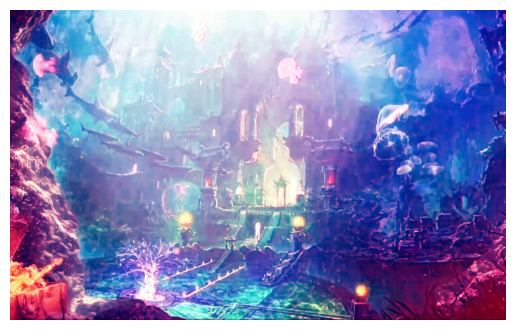

In [6]:
with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(update(None))
ax.axis('off')

display(fig)

## 4. 请编程处理apple.jpg和heart.jpeg两张图片，并进行图像合并，最后形成如下所示的单一图像（尺寸480*480），将图像保存为新文件。（注意可能需要用到cv2.resize()对原始图像做缩放。）

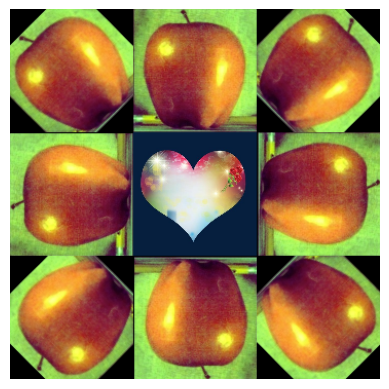

In [7]:
appleImg = cv2.resize(cv2.imread(apple_image_path),(120,120))
heartImg = cv2.resize(cv2.imread(hear_image_path),(120,120))
height, width = appleImg.shape[:2]

angles = [[45,0,-45],
          [90,None,-90],
          [135,180,-135]
          ]

img = []

for a in angles :
    pieces = []
    for i in a :
        pieces.append(cv2.warpAffine(
                appleImg, 
                cv2.getRotationMatrix2D((height/2,width/2), i, 1), 
                (height,width) ) if i is not None else heartImg)
    
    img.append(np.hstack(pieces))

img = np.vstack(img)

with plt.ioff():
    fig, ax = plt.subplots(1)

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.axis('off')

display(fig)

**本地代码**（仅供参考）

1) 使用OpenCV打开一个彩色图像文件，对其进行灰度转换、二值等操作，使用imread函数显示原图像和变换后的图像，并将变换后的灰度图像和二值化图像分别保存为新文件。

```
import cv2

path = r'替换成实际原图像的路径。'
saveGrayImgPath = r'替换成灰度图的保存路径（带文件名）'
saveBinaryImgPath = r'替换成二值图的保存路径（带文件名）'

sourceImg = cv2.imread(path)
grayImg = cv2.cvtColor(sourceImg, cv2.COLOR_BGR2GRAY)
ret, binaryImg = cv2.threshold(grayImg, 127, 255, cv2.THRESH_BINARY) 

cv2.imwrite(saveGrayImgPath,grayImg)
cv2.imwrite(saveBinaryImgPath,binaryImg)

cv2.imshow('sourceImg',sourceImg)
cv2.imshow('grayImg',grayImg)
cv2.imshow('binaryImg',binaryImg)
cv2.waitKey()

cv2.imwrite(saveGrayImgPath,grayImg)
cv2.imwrite(saveBinaryImgPath,binaryImg)
```

2) 使用numpy创建一幅大小为240×320（HW×）的图像（多维数组），图像中心是一个大小为100×100的红色正方形，周围是黑色，将图像保存为新文件。参考效果图如下所示。
   
```
import numpy
import cv2

savePath = r'替换成图片的保存路径（带文件名）'

img = numpy.zeros((240,320,3), dtype=numpy.uint8)

square_size = 100
start_row = (240 - square_size) // 2
start_col = (320 - square_size) // 2

img[start_row:start_row+square_size,
start_col:start_col+square_size] = [255, 0, 0]

cv2.imwrite(savePath, cv2.cvtColor(img,cv2.COLOR_RGB2BGR))
```

3) 使用numpy创建一幅大小为240×320（HW×）的图像（多维数组），图像中心是一个大小为100×100的红色正方形，周围是黑色，将图像保存为新文件。参考效果图如下所示。

```
import cv2

path = r'替换成实际原图像的路径。'

sourceImg = cv2.imread(path)
grayImg = cv2.cvtColor(sourceImg, cv2.COLOR_BGR2GRAY)
equalizeImg = sourceImg.copy()

channels = list(cv2.split(equalizeImg))
channels[1] = cv2.equalizeHist(channels[1])

equalizeImg = cv2.merge(channels,equalizeImg)

cv2.imshow('equalizeImg',equalizeImg)
cv2.waitKey()
```

4) 请编程处理apple.jpg和heart.jpeg两张图片，并进行图像合并，最后形成如下所示的单一图像（尺寸480*480），将图像保存为新文件。（注意可能需要用到cv2.resize()对原始图像做缩放。）

```
import numpy
import cv2
import matplotlib.pyplot as plt

appleImgPath = r'替换成apple.jpg的文件路径（带文件名）'
hearImgPath = r'替换成heart.jpeg的文件路径（带文件名）'
saveImgPath = r'替换成保存图片路径（带文件名）'

appleImg = cv2.resize(cv2.imread(appleImgPath),(120,120))
heartImg = cv2.resize(cv2.imread(hearImgPath),(120,120))
height, width = appleImg.shape[:2]

angles = [[45,0,-45],
          [90,None,-90],
          [135,180,-135]
          ]

img = []

for a in angles :
    picese = []
    for i in a :
        picese.append(cv2.warpAffine(
            appleImg,
            cv2.getRotationMatrix2D((height/2,width/2), i, 1),
            (height,width)
        ) if i is not None else heartImg
        )

    img.append(numpy.hstack(picese))

img = numpy.vstack(img)

cv2.imwrite(savePath, img)
```